In [1]:
%load_ext autoreload
%autoreload 2

### test EY analysis at one location

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvcircuit as pvc
import ipywidgets as widgets
%matplotlib widget

Tandems version 0.989
Data path is:  /Users/jgeisz/opt/anaconda3/envs/pvdev/lib/python3.9/site-packages/tandems/data/


In [3]:
#import EQE of WB417
path = pvc.datapath
file = 'WB417n6_C_EQE.csv'
df2J = pd.read_csv(path+file, index_col=0)
WB417_EQE = df2J.to_numpy(dtype=np.float64, copy=True) #numpy.ndarray
WB417_xEQE = df2J.index.to_numpy(dtype=np.float64, copy=True) #numpy.ndarray
EQE2J = pvc.EQE(WB417_EQE, WB417_xEQE, 'WB417_EQE')  #EQE class
EQE2J.sjuncs = ['GaInP','GaAs']  #rename junctions

#import TMY data of Boulder
Boulder = pvc.TMY(497)

#models of WB417
dev3T = pvc.Tandem3T()
dev3T.set(name='WB417dev3T', Rz = 2.3)
dev3T.top.set(Eg=1.87, J0ratio=[ 80., 22.], Jext=0.0131, Gsh=1e-8)   
dev3T.bot.set(Eg=1.419, J0ratio=[10., 15.], Jext=0.0128, Gsh= 5e-5)
dev3T.bot.set(Rser=0.2, beta=5, area=0.89)
dev2T = pvc.Multi2T.copy3T(dev3T)

In [4]:
EQE2J.Jint('global')

array([[13.109, 12.785]])

In [5]:
EQE2J.Jdb(25)

(array([3.491e-29, 8.700e-22]), array([1.871, 1.419]))

global 1000.4707036093448  W/m2
Eg =  [1.871 1.419]  eV
Jsc =  [[13.109 12.785]]  mA/cm2


(<AxesSubplot:xlabel='Wavelength (nm)', ylabel='EQE'>,
 <AxesSubplot:ylabel='Irradiance (W/m2/nm)'>)

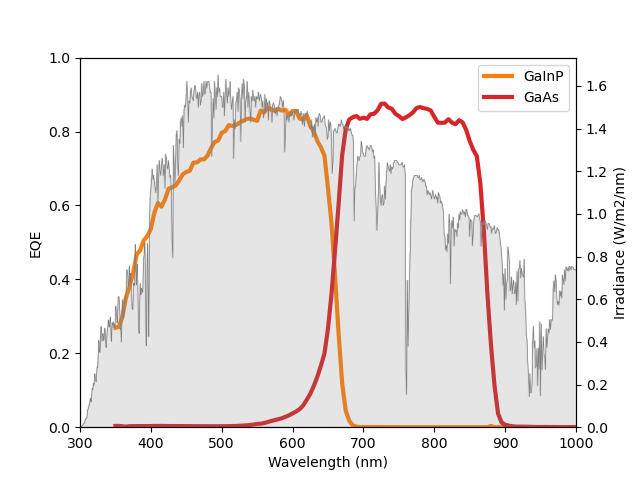

In [6]:
EQE2J.plot()

In [7]:
Boulder = pvc.TMY(497)
Boulder.name

'40.13_-105.22_1616_-7_axis'

In [8]:
Boulder.cellcurrents(EQE2J)
print(Boulder.JscSTCs, Boulder.RefPower, Boulder.YearlyEnergy)

[[0.016 0.014]
 [0.013 0.013]
 [0.011 0.012]] [1348.043 1000.471  900.187] 2082.870057087224


In [9]:
#cfglist = ['VM11','VM43','VM32','VM21','VM31','VM41','MPP','CM']
cfglist = pvc.EY.VMlist(9)
num = len(cfglist)
ratio = [0] * num
sEY = [0] * num
rEY = [0] * num
sEYeff = [0] * num
rEYeff = [0] * num
sSTCeff = [0] * num
rSTCeff = [0] * num
sloss = [0] * num
rloss = [0] * num
for i, cfg in enumerate(cfglist):
    dev3T.bot.set(pn=1) #s-type 
    ratio[i], type3T, sEY[i], sEYeff[i], sSTCeff[i], sloss[i] = Boulder.cellpower(dev3T,cfg)
    dev3T.bot.set(pn=-1) #r-type 
    ratio[i], type3T, rEY[i], rEYeff[i], rSTCeff[i], rloss[i] = Boulder.cellpower(dev3T,cfg)    

In [18]:
df = pd.DataFrame()
df['cfglist'] = cfglist
df['ratio'] = ratio
df['sEY'] = sEY
df['rEY'] = rEY
df['sEYeff'] = sEYeff
df['rEYeff'] = rEYeff
df['sSTCeff'] = sSTCeff
df['rSTCeff'] = rSTCeff
df['sloss'] = sloss
df['rloss'] = rloss

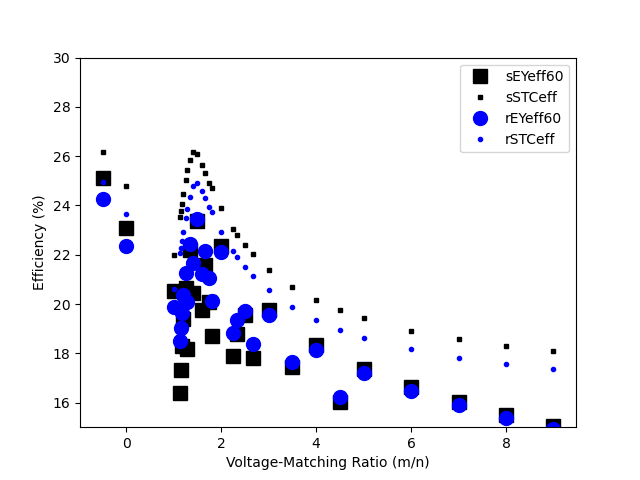

In [19]:
fig, ax = plt.subplots()
ax.plot(df['ratio'], 100*df['sEYeff']*df['sloss'], c='black', ms=10, lw=0, marker='s', label='sEYeff60')
ax.plot(df['ratio'], 100*df['sSTCeff'], c='black', ms=3, lw=0, marker='s', label='sSTCeff')
ax.plot(df['ratio'], 100*df['rEYeff']*df['rloss'], c='blue', ms=10, lw=0, marker='o', label='rEYeff60')
ax.plot(df['ratio'], 100*df['rSTCeff'], c='blue', ms=3, lw=0, marker='o', label='rSTCeff')
ax.set_ylim(15,30)
ax.set_ylabel('Efficiency (%)')
ax.set_xlabel('Voltage-Matching Ratio (m/n)')
ax.legend()